In [1]:
import tensorflow as tf
import numpy as np
from formatData import loadData
from sklearn.model_selection import train_test_split
from gan import GenAdvNetwork
import os
from matplotlib import pyplot as plt

2023-03-06 00:44:29.990177: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
"""
Loading data
Note than we can only specify absolute location of the raw data
"""
molRep2D, energies = loadData(12, "/home/panthibivek/thesis/GAN_pkg/data/traj.xyz")
#randomize the data and split it into training and test set
# unison_shuffle(molRep2D, energies)
X_train, X_test, y_train, y_test = train_test_split(molRep2D,energies,
                                   random_state=104, 
                                   test_size=0.1, 
                                   shuffle=True)

print("Training data size:", X_train.shape)
print("Test data size:", X_test.shape)

input data size: (10000, 78)
output data size: (10000,)
Training data size: (9000, 78)
Test data size: (1000, 78)


In [3]:
latent_dim_ = 78
epochs_ = 80
batch_size_ = 32
y_train = np.reshape(y_train, (-1, 1))
X_train = np.array(X_train)
X_train = X_train.astype(float)
X_train = np.reshape(X_train, (-1, 78, 1))
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.shuffle(buffer_size=100).batch(batch_size_)

2023-03-06 00:44:32.110709: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-06 00:44:32.110781: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-06 00:44:32.162273: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-06 00:44:32.162349: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-06 00:44:32.162396: I tensorflow/compiler/xla/stream_executo

In [4]:
GAN_model = GenAdvNetwork(latent_dim=latent_dim_, batch_size=batch_size_)
GAN_model.compile(
    generator_opt=tf.keras.optimizers.Adam(learning_rate=0.001),
    discriminator_opt=tf.keras.optimizers.Adam(learning_rate=0.001),
    disc_loss=tf.keras.losses.BinaryCrossentropy(),
    gen_loss=tf.keras.losses.MAE
)
history = GAN_model.fit(dataset, epochs=epochs_)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                1027      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 13)                0         
                                                                 
 reshape (Reshape)           (None, 13, 1)             0         
                                                                 
 conv1d_transpose (Conv1DTra  (None, 39, 128)          640       
 nspose)                                                         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 39, 128)           0         
                                                                 
 batch_normalization (BatchN  (None, 39, 128)          512       
 ormalization)                                           

2023-03-06 00:44:32.205997: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.206638: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.213414: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.213995: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.217281: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.218029: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.218839: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.219308: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.219755: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32

Epoch 1/80


2023-03-06 00:44:32.364368: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.366391: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.367407: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.367969: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.368617: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.369151: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.369578: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.370016: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.370404: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32

  1/282 [..............................] - ETA: 40s - g_loss: 7.2588 - d_loss: 0.6029

2023-03-06 00:44:32.407569: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.408614: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.409375: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.410211: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.410737: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.411522: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.412570: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.413443: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32.414374: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-06 00:44:32

282/282 [==============================] - 18s 65ms/step - g_loss: 6.5529 - d_loss: 0.0562
Epoch 2/80
282/282 [==============================] - 18s 63ms/step - g_loss: 3.9195 - d_loss: 2.2590e-04
Epoch 3/80
282/282 [==============================] - 18s 63ms/step - g_loss: 3.2991 - d_loss: 4.0774e-04
Epoch 4/80
282/282 [==============================] - 18s 63ms/step - g_loss: 2.9739 - d_loss: 2.8007e-05
Epoch 5/80
282/282 [==============================] - 18s 63ms/step - g_loss: 2.7761 - d_loss: 6.0231e-05
Epoch 6/80
282/282 [==============================] - 18s 63ms/step - g_loss: 2.6736 - d_loss: 1.2741e-04
Epoch 7/80
282/282 [==============================] - 18s 63ms/step - g_loss: 2.5875 - d_loss: 2.0006e-04
Epoch 8/80
282/282 [==============================] - 18s 63ms/step - g_loss: 2.5118 - d_loss: 0.0015
Epoch 9/80
282/282 [==============================] - 18s 63ms/step - g_loss: 2.4057 - d_loss: 1.3130e-04
Epoch 10/80
282/282 [==============================] - 18s 63ms/s

In [5]:
train_dir = os.path.dirname(os.path.abspath("__file__")) + "/runs/train/weights/"
GAN_model.save_weights(train_dir + "weights.h5")

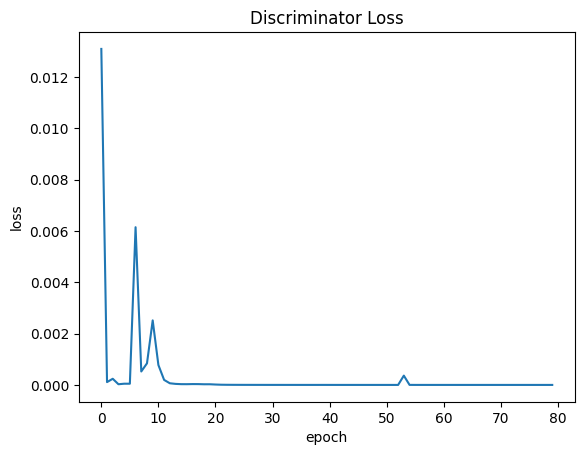

In [12]:
plt.plot(history.history['d_loss'])
plt.title('Discriminator Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
fig1 = plt.gcf()
plt.show()
fig1.savefig(train_dir + 'disLoss.png', dpi = 300)

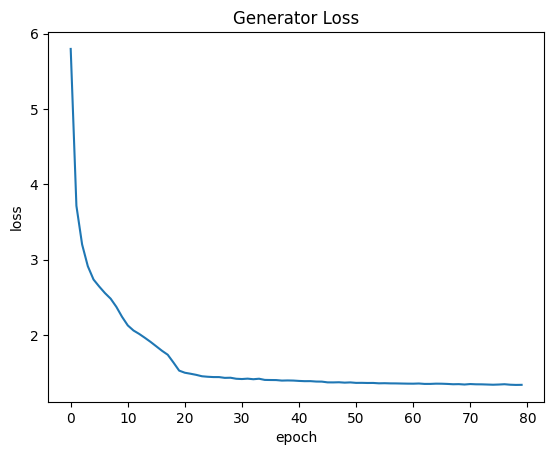

In [13]:
plt.plot(history.history['g_loss'])
plt.title('Generator Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
fig2 = plt.gcf()
plt.show()
fig2.savefig(train_dir + 'genLoss.png', dpi = 300)

In [14]:
from utils import random_generator
# generated_sample = GAN_model.generate_trajectories(1)
random_data = random_generator((1, latent_dim_))
print(random_data)
generated_sample = GAN_model.generator(random_data)
print(generated_sample)

tf.Tensor(
[[ 0.32295799 -0.2374559   0.74606293  1.64830232  1.23485017 -1.33623946
   0.96292329  0.79387122  0.50113845  0.64136279  1.13687813  0.34035206
   0.91246027  0.32624912 -1.27426183  0.27146089 -0.46516991  0.00808381
  -0.61959976  0.68139106  1.96666253  1.9319185  -1.28106296  1.65962148
  -1.01287246  0.92820674  0.17722413  0.31201005  1.13686419 -1.29812074
   1.25880432 -0.21619204  0.36252028 -1.39038551  1.12900412  1.29955328
   0.83751261  2.32608104 -0.06138828 -0.83353096 -0.2332025   0.04128353
   0.88626397  0.04072436 -0.97040302 -1.55718613 -0.5964765  -2.37470794
   1.06397355  1.24988449 -0.37623182  0.3220847   0.50534719  0.79507071
  -0.92962664  0.85897362 -0.50653034 -0.33148476 -0.28365052  0.47433886
   0.1515523   0.01593543  0.87689692 -0.92028922  0.6241045  -1.68873763
   0.89041531  1.30541539  0.18952699  0.85474074 -0.01548042 -0.30648667
   0.40115839 -0.77591377  0.14332248  0.77337891 -1.22273254  0.38376814]], shape=(1, 78), dtype=flo